In [1]:
import sys
import glob
import pickle
import hashlib
import PIL
from os.path import splitext, basename, join, isfile
from collections import defaultdict, Counter
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np

from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform

from delf import feature_io

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
query_images = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/test/*')
# index_images = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/index/*')
# compress
# query_images = [splitext(basename(path))[0] for path in query_images]
# index_images = [splitext(basename(path))[0] for path in index_images]

In [ ]:
query_path = '/media/hdd1/kaggle/landmark-retrieval-challenge/test/'
index_path = '/media/hdd1/kaggle/landmark-retrieval-challenge/index/'

In [31]:
img = cv2.imread(query_images[50])

sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.1, edgeThreshold=5)
kp1, des1 = sift.detectAndCompute(img, None)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(gray, None)

img_with_kp = cv2.drawKeypoints(img, kp1, None)
grey_with_kp = cv2.drawKeypoints(gray, kp2, None)

In [32]:
print('color', des1.shape)
print('grey', des2.shape)
print(np.array_equal(des1, des2))

color (1290, 128)
grey (1290, 128)
True


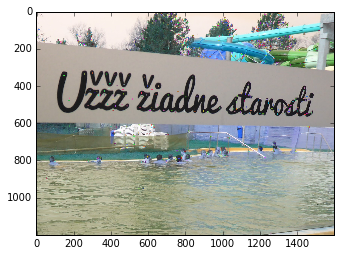

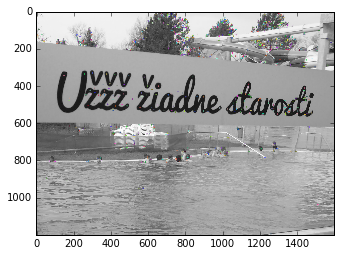

In [33]:
plt.imshow(img_with_kp)
plt.show()
plt.imshow(grey_with_kp)
plt.show()